In [7]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# reading the file 
df = pd.read_csv("CCPP/CCPP.csv")
df.sample(8)

,AT,V,AP,RH,EP
310,23.13,71.25,1002.49,94.59,431.91
4718,15.67,38.62,1015.76,66.29,463.17
5804,29.36,78.05,1011.12,64.17,434.29
9086,29.86,69.34,1007.76,54.12,433.57
5766,28.18,66.56,1005.69,65.67,426.79
3899,14.79,38.73,999.83,86.45,470.28
8210,33.75,64.96,1002.54,39.28,432.62
2951,9.27,42.02,1004.29,95.05,474.93


Text(820.5312499999999, 0.5, 'Frequency')

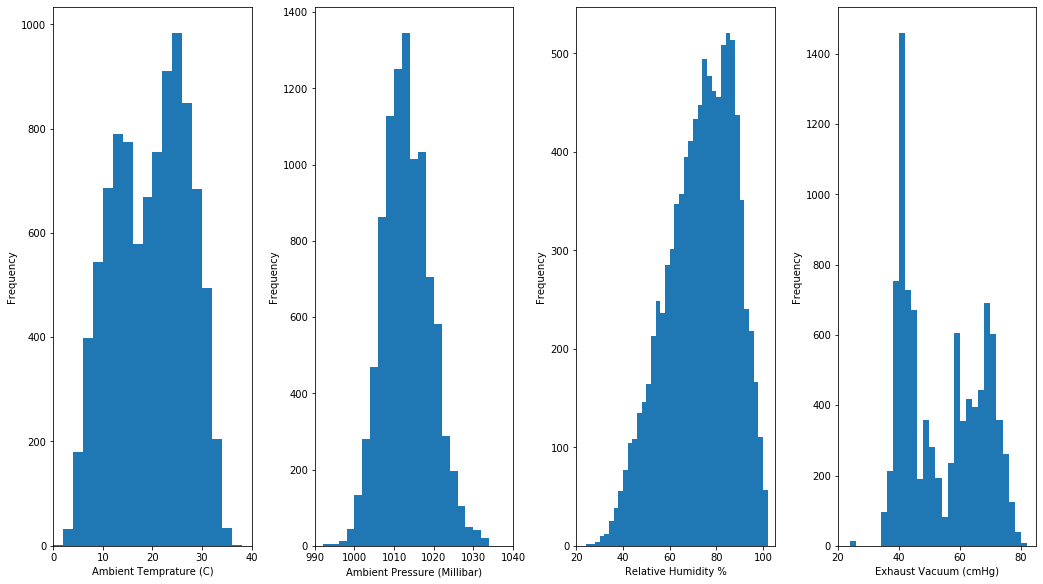

In [13]:
# univariant exploring 

plt.figure(figsize=[14.7, 8.27]) 

#subplot 1, Temperature histogram
plt.subplot(1,4,1)
plt.tight_layout()
bin_edges = np.arange(0, df["AT"].max()+2, 2)
plt.hist(data=df, x = "AT", bins = bin_edges)
plt.xlim([0,40])
plt.xlabel("Ambient Temprature (C)")
plt.ylabel("Frequency")

#subplot 2, Pressure histogram
plt.subplot(1,4,2)
plt.tight_layout()
bin_edges = np.arange(0, df["AP"].max()+2, 2)
plt.hist(data=df, x = "AP", bins = bin_edges)
plt.xlim([990,1040])
plt.xlabel("Ambient Pressure (Millibar)")
plt.ylabel("Frequency")

#subplot 3, Relative humidity histogram
plt.subplot(1,4,3)
plt.tight_layout()
bin_edges = np.arange(0, df["RH"].max()+2, 2)
plt.hist(data=df, x = "RH", bins = bin_edges)
plt.xlim([20,105])
plt.xlabel('Relative Humidity %')
plt.ylabel("Frequency")

#subplot 4, Exhaust Vacuum histogram 
plt.subplot(1,4,4)
plt.tight_layout()
bin_edges = np.arange(0, df["V"].max()+2, 2)
plt.hist(data=df, x = "V", bins = bin_edges)
plt.xlim([20,85])
plt.xlabel("Exhaust Vacuum (cmHg)")
plt.ylabel("Frequency")

Text(0.5, 0, 'Exhaust Vacuum')

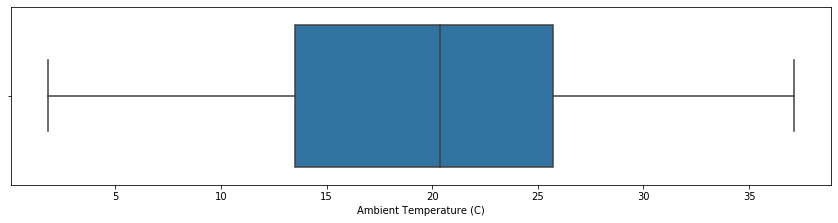

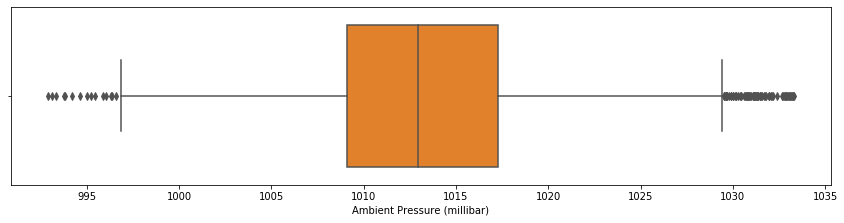

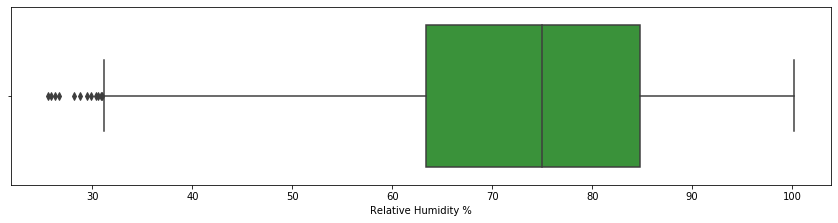

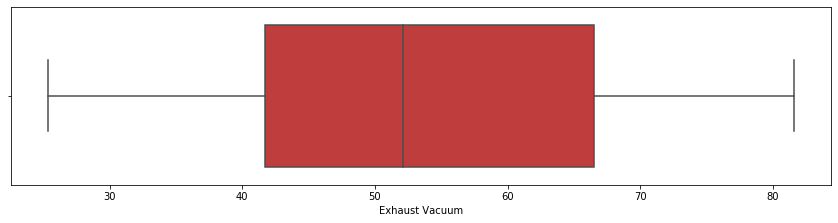

In [18]:
# Investigating box plots



plt.figure(figsize=[14.7, 3.27])
base_color = sb.color_palette()[0]
ax1 = sb.boxplot(data = df, x = "AT", color = base_color)
plt.xlabel("Ambient Temperature (C)")

plt.figure(figsize=[14.7, 3.27])
base_color = sb.color_palette()[1]
ax2 = sb.boxplot(data = df, x = "AP", color = base_color)
plt.xlabel("Ambient Pressure (millibar)")

plt.figure(figsize=[14.7, 3.27])
base_color = sb.color_palette()[2]
ax3 = sb.boxplot(data = df, x = "RH", color = base_color)
plt.xlabel("Relative Humidity %")

plt.figure(figsize=[14.7, 3.27])
base_color = sb.color_palette()[3]
ax4 = sb.boxplot(data = df, x = "V", color = base_color)
plt.xlabel("Exhaust Vacuum")

Text(0.5, 1, 'Correlation Heatmap')

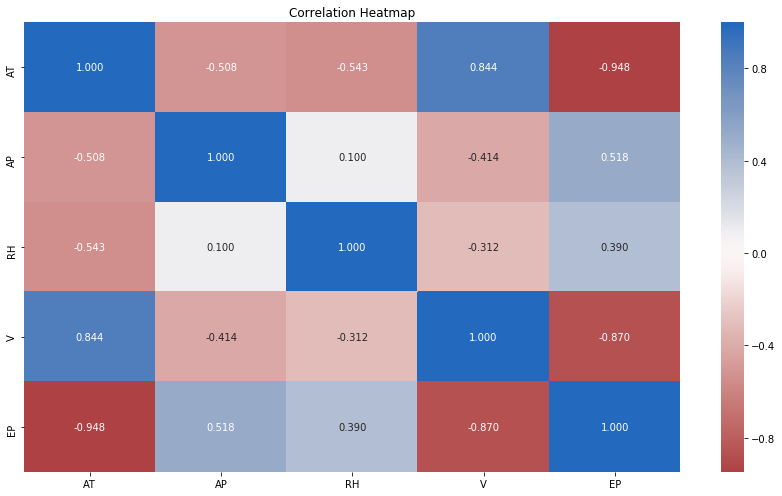

In [20]:
plt.figure(figsize=[14.7, 8.27]);
numeric_vars = ['AT', "AP", 'RH', 'V', 'EP']
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt='.3f',
          cmap = 'vlag_r', center =0);
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Energy Produced Vs Humidity')

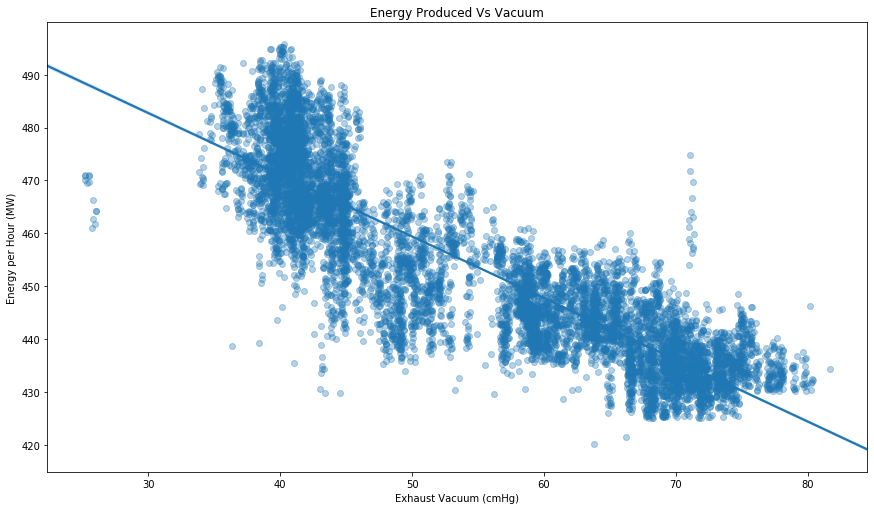

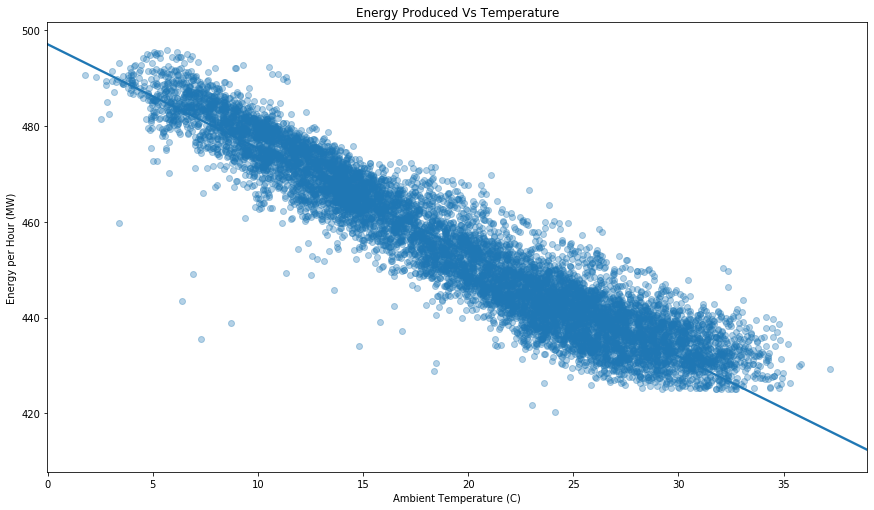

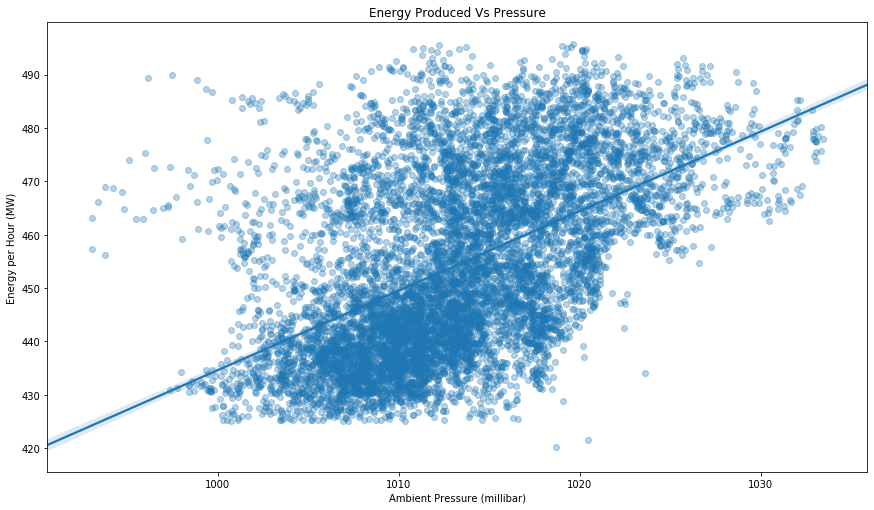

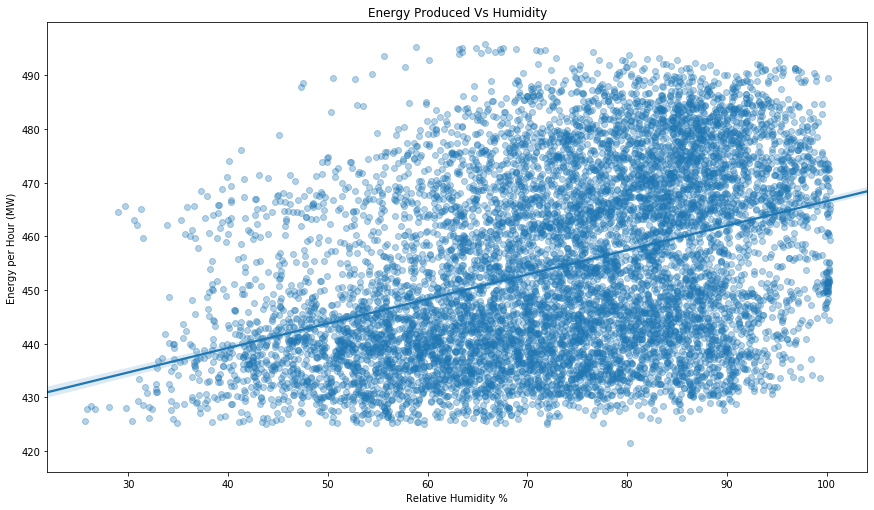

In [23]:
# A sccater plot with jitter and transparency 

plt.figure(figsize=[14.7, 8.27])
sb.regplot(data = df, x = "V", y="EP", fit_reg=True,
          x_jitter = 0.2, y_jitter=0.2, scatter_kws = {'alpha':1/3});
plt.xlabel('Exhaust Vacuum (cmHg)');
plt.ylabel('Energy per Hour (MW)')
plt.title("Energy Produced Vs Vacuum")

plt.figure(figsize=[14.7, 8.27])
sb.regplot(data = df, x = "AT", y="EP", fit_reg=True,
          x_jitter = 0.2, y_jitter=0.2, scatter_kws = {'alpha':1/3});
plt.xlabel('Ambient Temperature (C)');
plt.ylabel('Energy per Hour (MW)')
plt.title("Energy Produced Vs Temperature")

plt.figure(figsize=[14.7, 8.27])
sb.regplot(data = df, x = "AP", y="EP", fit_reg=True,
          x_jitter = 0.2, y_jitter=0.2, scatter_kws = {'alpha':1/3});
plt.xlabel('Ambient Pressure (millibar)');
plt.ylabel('Energy per Hour (MW)')
plt.title("Energy Produced Vs Pressure")

plt.figure(figsize=[14.7, 8.27])
sb.regplot(data = df, x = "RH", y="EP", fit_reg=True,
          x_jitter = 0.2, y_jitter=0.2, scatter_kws = {'alpha':1/3});
plt.xlabel('Relative Humidity %');
plt.ylabel('Energy per Hour (MW)')
plt.title("Energy Produced Vs Humidity")